# Main

In [142]:
from utils import *

In [143]:
alpha = 0.05
T_burnin = 30
lr = 0.01
Csat = 1.5
KI = 1.00
ahead = 1
seasonal_period = 7
n_series=3
n_points=360*3

In [144]:
# Parámetros del modelo PDI
# alpha = 0.05
# lr = 0.001
# T_burnin = 5
# Csat = 2.0
# KI = 1.0
# ahead = 1
# seasonal_period = 7

alpha = 0.05
T_burnin = 30
lr = 0.01
Csat = 1.5
KI = 5.0
ahead = 1
seasonal_period = 7
n_series=3
n_points=365*3

In [145]:
# Uso de la función
df = generar_datos(n_series=n_series, n_points=n_points, seed=42, start_date="2023-01-01")
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.4)

# plot_series_results_with_sets(df, key="SERIE_1")

In [146]:
df_pdi, logs = apply_pdi_with_calibration_with_diagnostics(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET"
)

  0%|          | 0/460 [00:00<?, ?it/s]c:\Users\Julian\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
  8%|▊         | 38/460 [00:00<00:01, 378.83it/s]

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 2: 0.0
⚠️ Cobertura baja en el paso 3: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 7: 0.0
⚠️ Cobertura baja en el paso 9: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 11: 0.0
⚠️ Cobertura baja en el paso 12: 0.0
⚠️ Cobertura baja en el paso 14: 0.0
⚠️ Cobertura baja en el paso 21: 0.0
⚠️ Cobertura baja en el paso 24: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 26: 0.0
⚠️ Cobertura baja en el paso 28: 0.0
⚠️ Cobertura baja en el paso 29: 0.0
⚠️ Cobertura baja en el paso 30: 0.0
⚠️ Cobertura baja en el paso 37: 0.0
⚠️ Cobertura baja en el paso 51: 0.0
⚠️ Cobertura baja en el paso 52: 0.0
⚠️ Cobertura baja en el paso 53: 0.0
⚠️ Cobertura baja en el paso 56: 0.0
⚠️ Cobertura baja en el paso 62: 0.0
⚠️ Cobertura baja en el paso 65: 0.0
⚠️ Cobertu

 17%|█▋        | 76/460 [00:00<00:03, 114.32it/s]

⚠️ Cobertura baja en el paso 70: 0.0
⚠️ Cobertura baja en el paso 81: 0.0


 21%|██        | 97/460 [00:01<00:04, 81.21it/s] 

⚠️ Cobertura baja en el paso 88: 0.0
⚠️ Cobertura baja en el paso 99: 0.0


 27%|██▋       | 124/460 [00:01<00:03, 90.16it/s]

⚠️ Cobertura baja en el paso 104: 0.0
⚠️ Cobertura baja en el paso 113: 0.0
⚠️ Cobertura baja en el paso 114: 0.0


 30%|██▉       | 136/460 [00:01<00:03, 90.27it/s]

⚠️ Cobertura baja en el paso 124: 0.0
⚠️ Cobertura baja en el paso 134: 0.0
⚠️ Cobertura baja en el paso 138: 0.0


 37%|███▋      | 168/460 [00:01<00:03, 89.03it/s]

⚠️ Cobertura baja en el paso 154: 0.0
⚠️ Cobertura baja en el paso 157: 0.0


 43%|████▎     | 199/460 [00:02<00:02, 89.26it/s]

⚠️ Cobertura baja en el paso 181: 0.0
⚠️ Cobertura baja en el paso 191: 0.0
⚠️ Cobertura baja en el paso 194: 0.0
⚠️ Cobertura baja en el paso 196: 0.0


 50%|█████     | 232/460 [00:02<00:02, 97.24it/s]

⚠️ Cobertura baja en el paso 217: 0.0
⚠️ Cobertura baja en el paso 230: 0.0
⚠️ Cobertura baja en el paso 235: 0.0


 57%|█████▋    | 264/460 [00:02<00:01, 98.28it/s]

⚠️ Cobertura baja en el paso 250: 0.0
⚠️ Cobertura baja en el paso 251: 0.0
⚠️ Cobertura baja en el paso 256: 0.0
⚠️ Cobertura baja en el paso 260: 0.0


 63%|██████▎   | 288/460 [00:03<00:01, 100.88it/s]

⚠️ Cobertura baja en el paso 276: 0.0
⚠️ Cobertura baja en el paso 284: 0.0
⚠️ Cobertura baja en el paso 287: 0.0


 67%|██████▋   | 310/460 [00:03<00:01, 100.70it/s]

⚠️ Cobertura baja en el paso 297: 0.0
⚠️ Cobertura baja en el paso 318: 0.0


 75%|███████▌  | 345/460 [00:03<00:01, 100.31it/s]

⚠️ Cobertura baja en el paso 330: 0.0
⚠️ Cobertura baja en el paso 331: 0.0


 82%|████████▏ | 376/460 [00:03<00:00, 94.79it/s] 

⚠️ Cobertura baja en el paso 356: 0.0
⚠️ Cobertura baja en el paso 358: 0.0


 86%|████████▌ | 396/460 [00:04<00:00, 92.90it/s]

⚠️ Cobertura baja en el paso 387: 0.0
⚠️ Cobertura baja en el paso 392: 0.0
⚠️ Cobertura baja en el paso 396: 0.0
⚠️ Cobertura baja en el paso 400: 0.0
⚠️ Cobertura baja en el paso 401: 0.0


 95%|█████████▍| 436/460 [00:04<00:00, 89.49it/s]

⚠️ Cobertura baja en el paso 418: 0.0
⚠️ Cobertura baja en el paso 424: 0.0
⚠️ Cobertura baja en el paso 431: 0.0


100%|██████████| 460/460 [00:04<00:00, 95.32it/s]
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

⚠️ Cobertura baja en el paso 444: 0.0


  0%|          | 0/460 [00:00<?, ?it/s]

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 2: 0.0
⚠️ Cobertura baja en el paso 3: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 7: 0.0
⚠️ Cobertura baja en el paso 9: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 11: 0.0
⚠️ Cobertura baja en el paso 12: 0.0
⚠️ Cobertura baja en el paso 13: 0.0
⚠️ Cobertura baja en el paso 18: 0.0
⚠️ Cobertura baja en el paso 19: 0.0
⚠️ Cobertura baja en el paso 20: 0.0
⚠️ Cobertura baja en el paso 23: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 27: 0.0
⚠️ Cobertura baja en el paso 28: 0.0


c:\Users\Julian\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
 10%|▉         | 44/460 [00:00<00:00, 439.85it/s]

⚠️ Cobertura baja en el paso 34: 0.0
⚠️ Cobertura baja en el paso 46: 0.0
⚠️ Cobertura baja en el paso 47: 0.0
⚠️ Cobertura baja en el paso 54: 0.0
⚠️ Cobertura baja en el paso 60: 0.0


 19%|█▉        | 88/460 [00:00<00:01, 193.43it/s]

⚠️ Cobertura baja en el paso 72: 0.0
⚠️ Cobertura baja en el paso 76: 0.0
⚠️ Cobertura baja en el paso 77: 0.0
⚠️ Cobertura baja en el paso 80: 0.0
⚠️ Cobertura baja en el paso 87: 0.0
⚠️ Cobertura baja en el paso 88: 0.0
⚠️ Cobertura baja en el paso 89: 0.0
⚠️ Cobertura baja en el paso 95: 0.0
⚠️ Cobertura baja en el paso 105: 0.0
⚠️ Cobertura baja en el paso 109: 0.0


 25%|██▌       | 115/460 [00:00<00:02, 157.37it/s]

⚠️ Cobertura baja en el paso 113: 0.0
⚠️ Cobertura baja en el paso 120: 0.0
⚠️ Cobertura baja en el paso 124: 0.0
⚠️ Cobertura baja en el paso 127: 0.0


 33%|███▎      | 152/460 [00:00<00:02, 136.22it/s]

⚠️ Cobertura baja en el paso 139: 0.0
⚠️ Cobertura baja en el paso 149: 0.0
⚠️ Cobertura baja en el paso 158: 0.0


 39%|███▉      | 181/460 [00:01<00:02, 123.28it/s]

⚠️ Cobertura baja en el paso 169: 0.0
⚠️ Cobertura baja en el paso 170: 0.0
⚠️ Cobertura baja en el paso 175: 0.0
⚠️ Cobertura baja en el paso 176: 0.0


 45%|████▍     | 206/460 [00:01<00:02, 104.53it/s]

⚠️ Cobertura baja en el paso 192: 0.0
⚠️ Cobertura baja en el paso 196: 0.0


 47%|████▋     | 217/460 [00:01<00:02, 98.79it/s] 

⚠️ Cobertura baja en el paso 210: 0.0


 52%|█████▏    | 237/460 [00:01<00:02, 91.28it/s]

⚠️ Cobertura baja en el paso 227: 0.0
⚠️ Cobertura baja en el paso 228: 0.0
⚠️ Cobertura baja en el paso 234: 0.0
⚠️ Cobertura baja en el paso 236: 0.0
⚠️ Cobertura baja en el paso 242: 0.0


 58%|█████▊    | 267/460 [00:02<00:02, 92.65it/s]

⚠️ Cobertura baja en el paso 249: 0.0
⚠️ Cobertura baja en el paso 268: 0.0


 63%|██████▎   | 288/460 [00:02<00:01, 95.01it/s]

⚠️ Cobertura baja en el paso 277: 0.0
⚠️ Cobertura baja en el paso 295: 0.0


 67%|██████▋   | 309/460 [00:02<00:01, 92.14it/s]

⚠️ Cobertura baja en el paso 297: 0.0
⚠️ Cobertura baja en el paso 307: 0.0


 72%|███████▏  | 329/460 [00:02<00:01, 92.80it/s]

⚠️ Cobertura baja en el paso 317: 0.0


 76%|███████▌  | 349/460 [00:03<00:01, 89.07it/s]

⚠️ Cobertura baja en el paso 337: 0.0
⚠️ Cobertura baja en el paso 339: 0.0


 84%|████████▍ | 386/460 [00:03<00:00, 86.37it/s]

⚠️ Cobertura baja en el paso 372: 0.0
⚠️ Cobertura baja en el paso 374: 0.0


 90%|█████████ | 414/460 [00:03<00:00, 84.65it/s]

⚠️ Cobertura baja en el paso 401: 0.0


 96%|█████████▌| 441/460 [00:04<00:00, 83.27it/s]

⚠️ Cobertura baja en el paso 428: 0.0
⚠️ Cobertura baja en el paso 431: 0.0
⚠️ Cobertura baja en el paso 432: 0.0
⚠️ Cobertura baja en el paso 444: 0.0


100%|██████████| 460/460 [00:04<00:00, 104.13it/s]
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 3: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 9: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 12: 0.0
⚠️ Cobertura baja en el paso 13: 0.0
⚠️ Cobertura baja en el paso 16: 0.0
⚠️ Cobertura baja en el paso 18: 0.0
⚠️ Cobertura baja en el paso 20: 0.0
⚠️ Cobertura baja en el paso 22: 0.0
⚠️ Cobertura baja en el paso 23: 0.0
⚠️ Cobertura baja en el paso 24: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 28: 0.0
⚠️ Cobertura baja en el paso 30: 0.0
⚠️ Cobertura baja en el paso 31: 0.0
⚠️ Cobertura baja en el paso 32: 0.0
⚠️ Cobertura baja en el paso 40: 0.0
⚠️ Cobertura baja en el paso 44: 0.0
⚠️ Cobertura baja en el paso 55: 0.0


 19%|█▉        | 88/459 [00:00<00:01, 193.89it/s]

⚠️ Cobertura baja en el paso 60: 0.0
⚠️ Cobertura baja en el paso 65: 0.0
⚠️ Cobertura baja en el paso 66: 0.0
⚠️ Cobertura baja en el paso 71: 0.0


 25%|██▍       | 113/459 [00:00<00:02, 170.27it/s]

⚠️ Cobertura baja en el paso 100: 0.0
⚠️ Cobertura baja en el paso 105: 0.0
⚠️ Cobertura baja en el paso 107: 0.0
⚠️ Cobertura baja en el paso 112: 0.0
⚠️ Cobertura baja en el paso 120: 0.0


 33%|███▎      | 150/459 [00:00<00:02, 145.65it/s]

⚠️ Cobertura baja en el paso 131: 0.0
⚠️ Cobertura baja en el paso 136: 0.0
⚠️ Cobertura baja en el paso 140: 0.0
⚠️ Cobertura baja en el paso 146: 0.0
⚠️ Cobertura baja en el paso 149: 0.0


 39%|███▉      | 181/459 [00:01<00:02, 135.61it/s]

⚠️ Cobertura baja en el paso 161: 0.0
⚠️ Cobertura baja en el paso 167: 0.0
⚠️ Cobertura baja en el paso 170: 0.0


 46%|████▌     | 209/459 [00:01<00:01, 128.12it/s]

⚠️ Cobertura baja en el paso 193: 0.0
⚠️ Cobertura baja en el paso 195: 0.0
⚠️ Cobertura baja en el paso 198: 0.0
⚠️ Cobertura baja en el paso 216: 0.0


 51%|█████     | 234/459 [00:01<00:01, 118.33it/s]

⚠️ Cobertura baja en el paso 219: 0.0
⚠️ Cobertura baja en el paso 230: 0.0
⚠️ Cobertura baja en el paso 234: 0.0


 57%|█████▋    | 260/459 [00:01<00:01, 114.94it/s]

⚠️ Cobertura baja en el paso 244: 0.0
⚠️ Cobertura baja en el paso 246: 0.0
⚠️ Cobertura baja en el paso 251: 0.0


 62%|██████▏   | 284/459 [00:02<00:01, 108.86it/s]

⚠️ Cobertura baja en el paso 269: 0.0


 67%|██████▋   | 306/459 [00:02<00:01, 101.96it/s]

⚠️ Cobertura baja en el paso 294: 0.0
⚠️ Cobertura baja en el paso 295: 0.0
⚠️ Cobertura baja en el paso 308: 0.0
⚠️ Cobertura baja en el paso 312: 0.0
⚠️ Cobertura baja en el paso 313: 0.0


 71%|███████▏  | 328/459 [00:02<00:01, 99.90it/s] 

⚠️ Cobertura baja en el paso 316: 0.0
⚠️ Cobertura baja en el paso 321: 0.0
⚠️ Cobertura baja en el paso 328: 0.0
⚠️ Cobertura baja en el paso 331: 0.0
⚠️ Cobertura baja en el paso 333: 0.0


 78%|███████▊  | 359/459 [00:02<00:01, 91.77it/s]

⚠️ Cobertura baja en el paso 339: 0.0


 80%|████████  | 369/459 [00:03<00:01, 88.39it/s]

⚠️ Cobertura baja en el paso 361: 0.0
⚠️ Cobertura baja en el paso 368: 0.0
⚠️ Cobertura baja en el paso 371: 0.0


 86%|████████▋ | 397/459 [00:03<00:00, 86.63it/s]

⚠️ Cobertura baja en el paso 381: 0.0


 90%|█████████ | 415/459 [00:03<00:00, 84.27it/s]

⚠️ Cobertura baja en el paso 405: 0.0
⚠️ Cobertura baja en el paso 413: 0.0


 96%|█████████▋| 442/459 [00:03<00:00, 81.25it/s]

⚠️ Cobertura baja en el paso 426: 0.0
⚠️ Cobertura baja en el paso 432: 0.0


100%|██████████| 459/459 [00:04<00:00, 112.38it/s]

⚠️ Cobertura baja en el paso 458: 0.0



c:\Users\Julian\FCPDIHC\PDIHC\utils.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

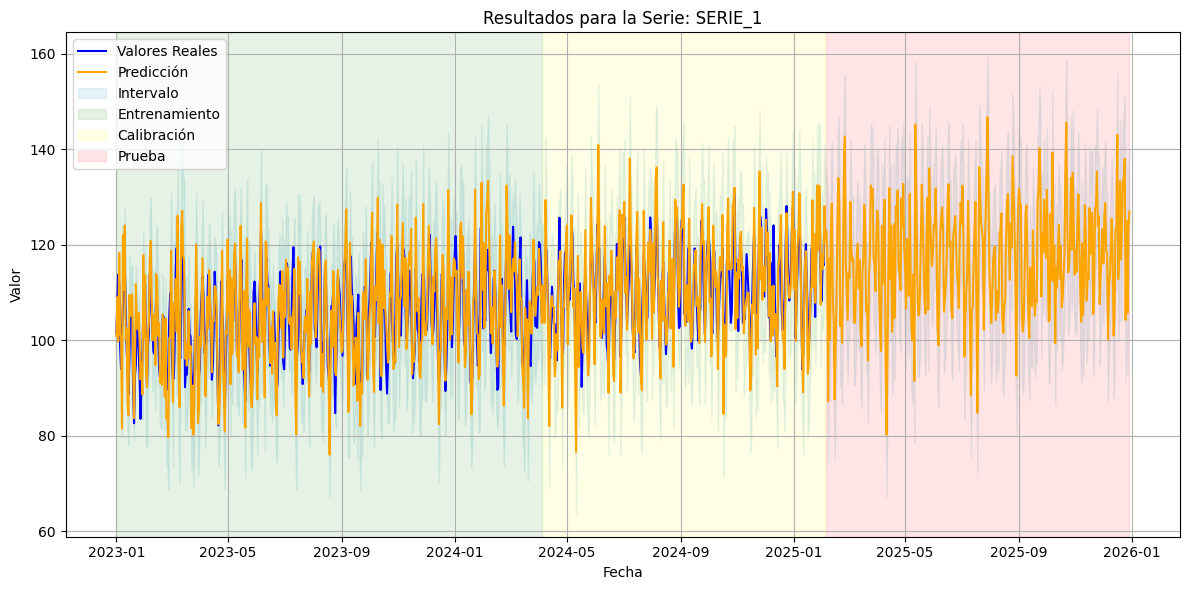

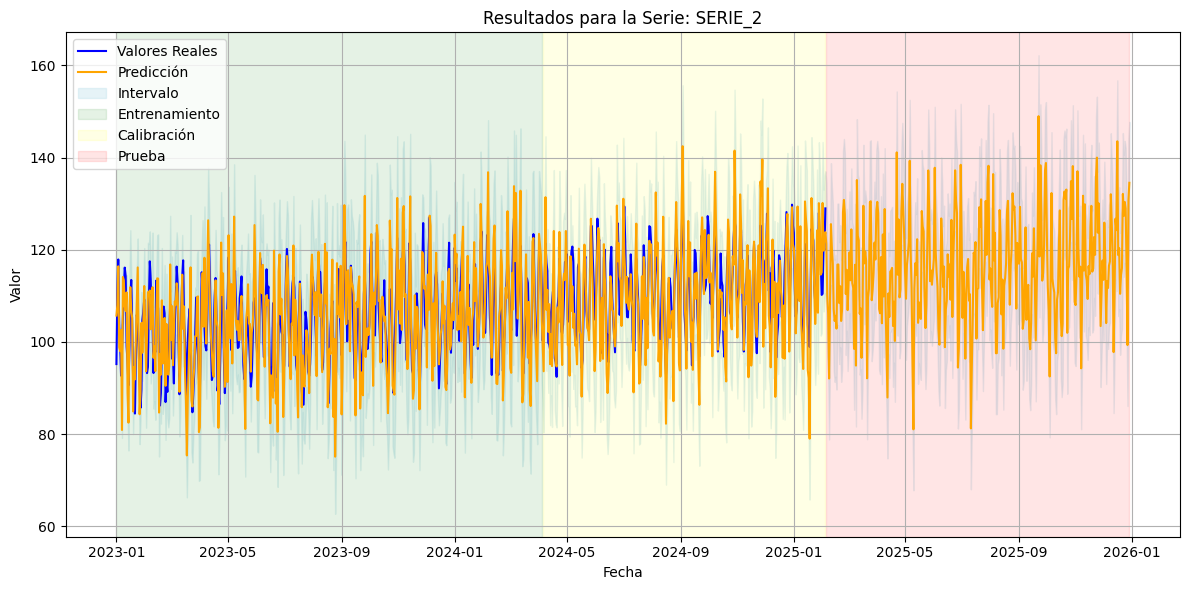

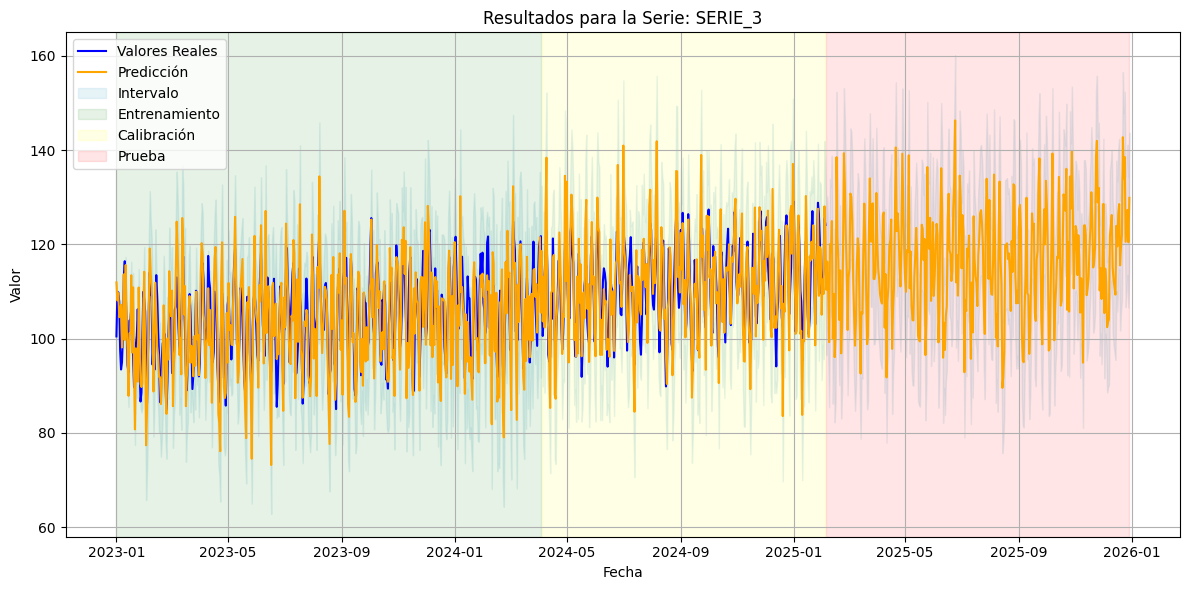

In [147]:
# Bucle para visualizar resultados para todas las series
for i in range(1, n_series + 1):
    key = f"SERIE_{i}"
    plot_series_results_with_sets(df_pdi, key=key)

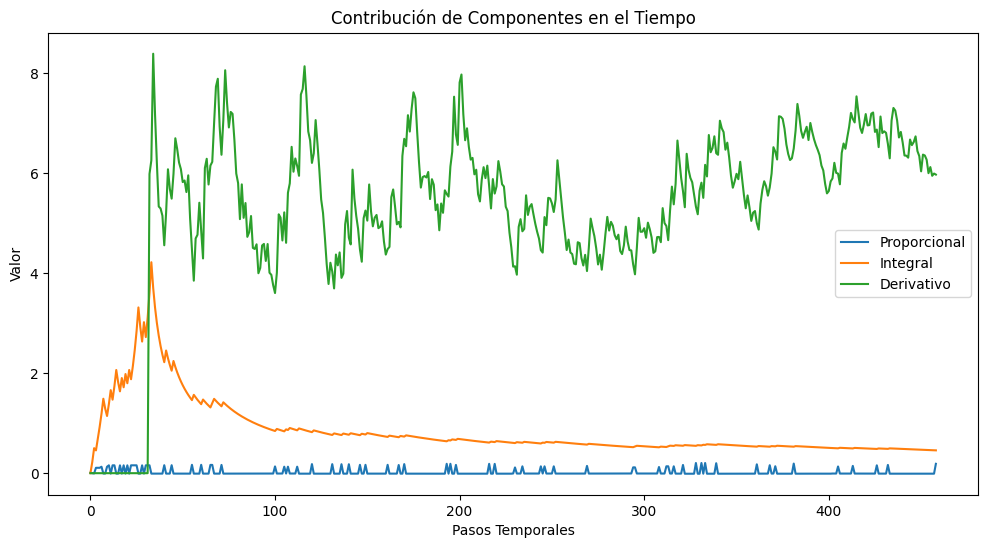

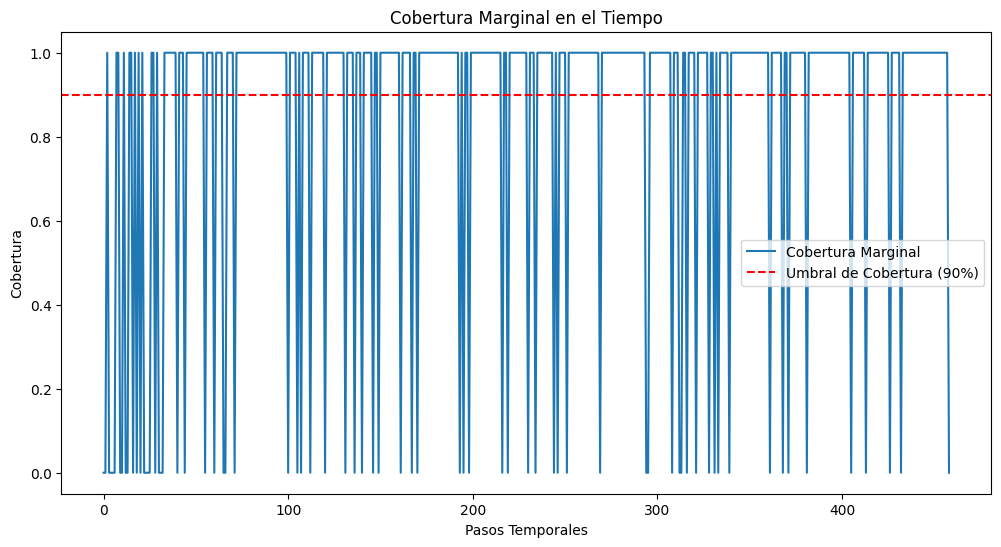

In [148]:
plot_logs(logs)

In [149]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
train_metrics_by_key = calculate_metrics(
    train_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Train):")
print(train_metrics_by_key)

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)


Métricas por KEY (Train):
     Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0  SERIE_1           0.850000           -0.100000            22.319679   
1  SERIE_2           0.847826           -0.102174            23.071860   
2  SERIE_3           0.843137           -0.106863            22.591977   

   Winkler Score  
0      43.251253  
1      44.554588  
2      46.681545  
Métricas por KEY (Calibración):
     Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0  SERIE_1           0.941176           -0.008824            25.941324   
1  SERIE_2           0.928105           -0.021895            26.433969   
2  SERIE_3           0.954397            0.004397            27.656829   

   Winkler Score  
0      32.299813  
1      32.812665  
2      31.863031  
